In [1]:
import os, sys, pickle
sys.path.append('../')
sys.path.append('../scripts')
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models import OHLC, Products, Product
from tools import ohlc_chart, view

In [4]:
products = pickle.load(open('../data/products.pkl', 'rb')) #종목정보
db = tb.open_file('../data/minute.db', mode='r') #분데이터 db 로드

In [39]:
symbol = 'GC'
product = products[symbol]
tbl = db.root[symbol]
data = tbl.Minute.read()
mapper = tbl.DateMapper.read(field='date')
data['row'] = mapper[data['row']]
df = pd.DataFrame(data.astype([('date', 'M8[s]'), ('price', '<f8'), ('value', '<f8')]))
df = df[df.date > '2017-05-01'].sort_values(by='date') #실제 분데이터 저장된 데이터만 사용

In [40]:
#분봉사이의 간격을 시간단위(td)로 나타내는 컬럼
df['td'] = (df.date - df.shift(1).date)/np.timedelta64(1, 'h')
#1시간이상 거래가 없으면 거래일이 바뀐것으로 간주하여 전체 데이터를 일간 데이터단위로 나눔
days=np.split(df, np.where(df['td']>=1)[0])

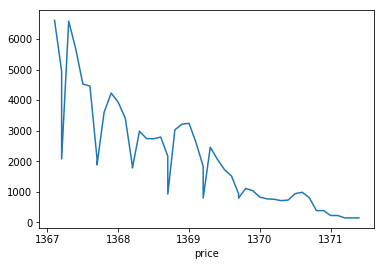

In [42]:
df.groupby('price').sum()['value'].iloc[-50:].plot()

In [43]:
i=0

2017-08-10 07:01:00


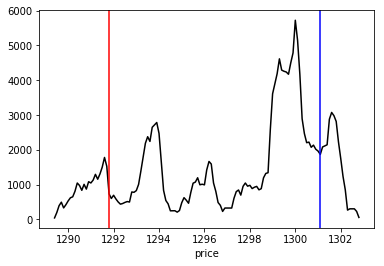

In [117]:
day = days[i]
ax= day.groupby('price').sum()['value'].plot(color='k')
ax.axvline(day.iloc[0]['price'], color='r') #시가
ax.axvline(day.iloc[-1]['price'], color='b') #종가
print(day['date'].iloc[0])
i+=1

In [510]:
g = day.groupby('price').sum()

In [521]:
(g.index*g.value).sum()/g.value.sum()

131.33183425149213

In [522]:
g.value.describe()

count     46.000000
mean     230.368324
std      157.255444
min        7.222222
25%      138.584896
50%      192.980952
75%      298.317546
max      680.411111
Name: value, dtype: float64

In [318]:
np.diff(arr)

array([1, 1, 3, 1, 1, 2])

In [126]:
a['row']=b['date'][a['row']]

In [130]:
a=a.astype([('row', 'M8[s]'), ('price', '<f8'), ('value', '<f8')])

In [139]:
df= pd.DataFrame(a[['price','value']], index=a['row'])

In [157]:
db.close()

In [78]:
np.where(a['row']==b['mapper'])

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49], dtype=int32),)

In [77]:
a['row']

array([282891, 282892, 282893, 282894, 282894, 282895, 282896, 282897,
       282898, 282898, 282899, 282899, 282900, 282901, 282902, 282903,
       282904, 282905, 282906, 282907, 282908, 282909, 282910, 282911,
       282912, 282913, 282914, 282915, 282916, 282917, 282918, 282919,
       282920, 282921, 282922, 282923, 282924, 282925, 282926, 282927,
       282928, 282929, 282930, 282931, 282932, 282933, 282934, 282935,
       282936, 282937], dtype=uint64)

In [73]:
b['mapper']

array([282888, 282889, 282890, 282891, 282892, 282893, 282894, 282895,
       282896, 282897, 282898, 282899, 282900, 282901, 282902, 282903,
       282904, 282905, 282906, 282907, 282908, 282909, 282910, 282911,
       282912, 282913, 282914, 282915, 282916, 282917, 282918, 282919,
       282920, 282921, 282922, 282923, 282924, 282925, 282926, 282927,
       282928, 282929, 282930, 282931, 282932, 282933, 282934, 282935,
       282936, 282937], dtype=uint32)

In [79]:
a=np.arange(10)

In [82]:
a = np.array([1,2,3,4,5,6,7,8,9])

In [83]:
b=np.array([3,4,6,1,1,1,2,3,8])

In [ ]:
np.where()